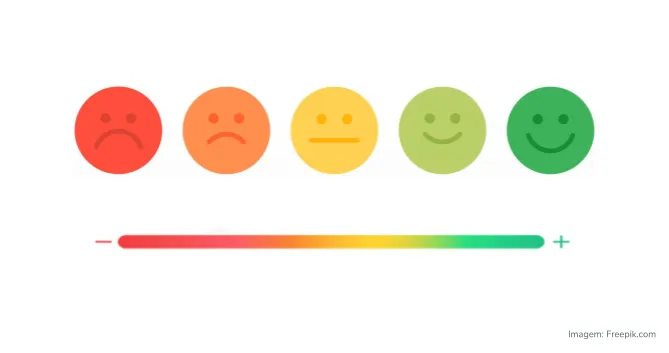

# Combinando modelos de Machine Learning com Lógica Fuzzy — Parte 1

## Mas o que é lógica fuzzy?
A lógica fuzzy (em português também pode ser chamada de lógica difusa) já é um conceito bem antigo, que surgiu na década de 60 e é aplicada em diversas áreas, desde engenharia até inteligência artificial. Basicamente, ela consiste em modelar um problema de modo aproximado ao invés de preciso, assim como é o raciocínio humano em diversas situações.

Uma analogia que eu achei interessante fazer quando estudava sobre lógica fuzzy foi de associá-la a uma escala likert, visto que, diferente de uma pesquisa binária, nessa escala as respostas variam conforme o grau de concordância da pessoa respondendo a uma determinada pergunta. A figura abaixo ilustra essa diferença entre a lógica clássica (binária) e a lógica fuzzy caso fizéssemos uma pesquisa sobre uma mesma pergunta utilizando essas duas abordagens distintas:

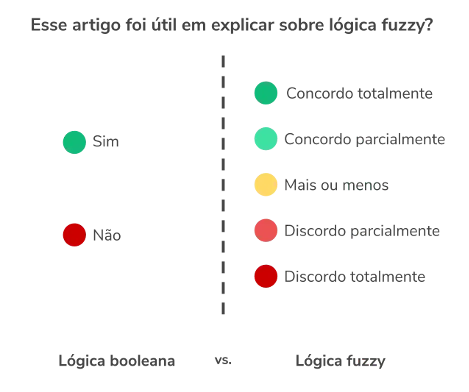

Desse modo, enquanto que na lógica binária nós só temos uma resposta que pode assumir apenas dois valores (no caso do exemplo acima, sim ou não), na lógica fuzzy nós podemos obter uma resposta que está entre esses dois valores (no exemplo acima, você poderia não concordar 100% com a pergunta feita, então poderia escolher a opção de concordar parcialmente).

Assim, na lógica fuzzy é possível trabalhar com informações incertas que nós comumente usamos em nosso dia a dia (como responder questionamentos com talvez, mais ou menos, às vezes, depende, etc.).

### E como podemos utilizar a lógica fuzzy para combinar os nossos modelos de Machine Learning?

Para utilizar a lógica fuzzy nessa combinação, precisamos construir um chamado Fuzzy Control System, que basicamente consiste em um sistema que utiliza a lógica difusa. Na imagem abaixo temos um resumo dos componentes que fazem parte de um sistema de controle difuso:

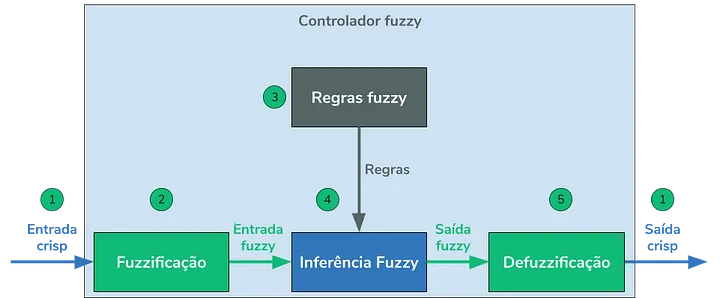

Abaixo será detalhado o que significa cada um desses componentes e como eles são definidos:

### 1) Entrada e saída crisp
Cada variável fuzzy possui um valor chamado de valor crisp, que nada mais é do que um número dentro de um domínio pré-determinado (na lógica fuzzy, esse domínio é chamado de universo). O universo então é a definição do intervalo dos valores no qual se encontra a variável e, por isso, precisamos definir quais são seus valores mínimo e máximo.

Para deixar esse conceito um pouco mais claro, imagine que temos um sistema que tem uma variável fuzzy referente à altura de uma pessoa. Assim, começamos definindo que o universo para essa variável terá o intervalo de 1,20 a 2 metros. Agora, vamos supor que eu fornecerei a minha altura para esse sistema; nesse caso, a entrada terá um valor crisp de 1,54 m.

Desse modo, as entradas para o sistema de controle fuzzy serão os valores crisp de cada variável. No nosso caso, como iremos aplicar a lógica fuzzy para combinar dois modelos de Machine Learning, o sistema receberá um valor crisp referente a predição de cada modelo e, portanto, para cada variável fuzzy. Além disso, a saída do sistema de controle também será um valor crisp (daqui a pouco falamos mais sobre isso).

### 2) Fuzzificação

A primeira etapa do sistema de controle fuzzy será aplicar a fuzzificação nas entradas crisp que foram recebidas. Essa etapa então consiste em transformar o valor crisp da entrada para um valor fuzzy e, para isso, precisamos definir os termos e funções de pertinência para esse sistema:

* Termo

Uma variável fuzzy pode ter diversos termos que podem ser utilizados para descrevê-la. Todos esses termos compõem o chamado conjunto fuzzy e são utilizados para definir qual será o valor fuzzy dessa variável fuzzy. Exemplos de termos usados para qualificar a variável fuzzy são: bom, mediano, alto, aceitável, às vezes, etc. Voltando no nosso exemplo da altura, o conjunto fuzzy da nossa variável poderia ter os seguintes termos: baixa, mediana e alta para caracterizar a estatura de uma pessoa.

* Função de Pertinência

Cada termo terá uma função de pertinência que definirá como o valor crisp será mapeado considerando uma escala (que varia entre 0 e 1) que reflete o grau de pertinência do valor para aquele termo. A função então define o pertencimento de um determinado elemento a um conjunto.

Essas funções podem ter diferentes formatos. Na imagem abaixo podemos ver algumas funções que podem ser utilizadas como função de pertinência:

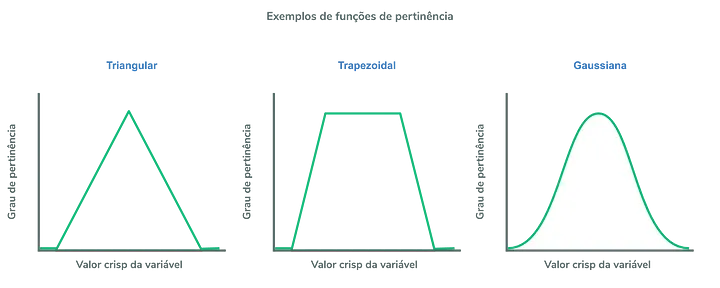

Para exemplificar, vamos usar novamente o exemplo da altura. Supondo que tenhamos uma função de pertinência trapezoidal para cada um dos termos baixa, mediana e alta, que caracterizam a estatura de uma pessoa:

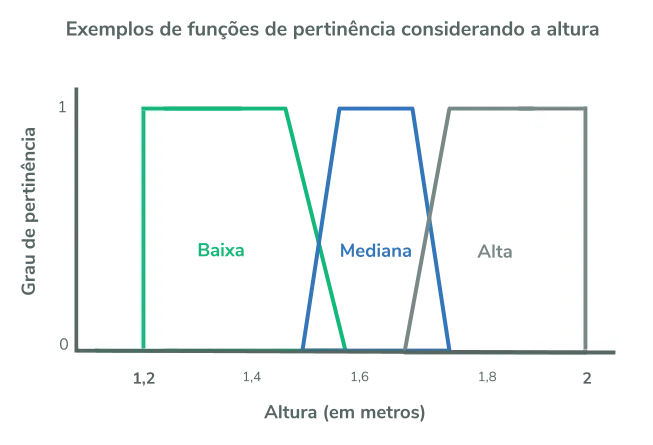

Na imagem acima, podemos notar que no eixo X do gráfico temos os valores crisp da variável altura (e que vão de 1,20 a 2 m, visto que foi esse o universo que definimos) e no eixo Y temos o grau de pertinência, que vai de 0 a 1. Dependendo da altura da pessoa, ela terá um determinado grau de pertinência para cada termo. Por exemplo, considerando o conjunto de pessoas de estatura baixa, pessoas completamente baixas (ou seja, que tenham um grau de pertinência igual a 1 para esse conjunto) seriam aquelas que tivessem uma altura entre 1,20 e 1,45 m aproximadamente, enquanto que pessoas que tivessem uma altura de 1,56 m seriam consideradas um pouco baixas, visto que o grau de pertinência para esse conjunto seria mais baixo e menor do que 1.

Também é interessante notar que há sobreposições entre as funções de pertinência que descrevem diferentes termos. Isso acontece justamente por conta da incerteza que é intrínseca ao conceito de lógica fuzzy (ou seja, uma pessoa com 2 m de altura claramente se encontra no conjunto de pessoas altas, mas uma pessoa com 1,70 m pertence tanto ao conjunto de pessoas altas quanto de pessoas de estatura mediana, de modo que seu grau de pertinência pode ser diferente para cada um desses conjuntos), sendo assim possível fazer uma transição gradual de um conjunto para o outro.

Exemplificando com a minha altura, vamos verificar qual é o meu grau de pertinência para o conjunto de pessoas baixas:



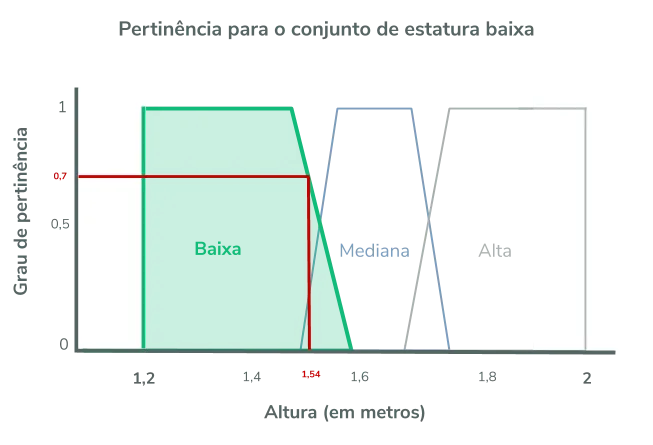

Nesse caso, se eu fornecesse minha altura, veríamos que, por eu ter 1,54 m, meu grau de pertinência para o conjunto de pessoas baixas é de 0,7. Abaixo, os gráficos demonstram o meu grau de pertinência para os dois conjuntos restantes:


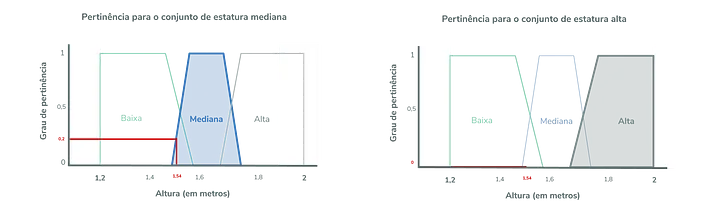

Acima, podemos notar que com 1,54 m, meu grau de pertinência para o conjunto de pessoas com estatura mediana já é bem menor do que o que eu obtive para o conjunto de pessoas baixas, visto que agora ele é de apenas 0,2. Já para o conjunto de pessoas altas, a triste realidade é que meu grau de pertinência para ele é igual a 0 😢.

### 3) Regras Fuzzy

Um outro componente importante para o sistema de controle são as regras fuzzy. Elas são utilizadas para ligar diferentes variáveis fuzzy, de modo que elas descrevem como uma ou mais variáveis fuzzy estão relacionadas umas com as outras.

Cada uma das regras que compõem o conjunto de regras fuzzy são expressas por meio de declaração de IF/THEN (ou, em português, SE/ENTÃO). A parte do SE é chamada de antecedente, enquanto que a parte do ENTÃO é chamada de consequente.

Vamos supor que queremos relacionar a altura e o peso de uma pessoa para determinar o tamanho de sua roupa (obviamente essa abordagem é extremamente simplista e que não faz tanto sentido assim, visto que o ideal seria pegar outras medidas do corpo como da cintura, busto, quadril, etc., mas vamos utilizá-lo como exemplo apenas por ser mais simples de entender 😉). Assim, poderíamos ter a seguinte regra fuzzy:



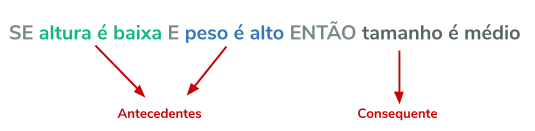

Na regra acima, é interessante notar que temos duas variáveis como antecedentes, conectadas por um E. Também poderíamos ter regras ligando essas variáveis com um OU ou NÃO. Por exemplo, poderíamos ter regras como:

* SE altura é média OU peso é médio ENTÃO tamanho é médio;
* SE altura NÃO é baixa ENTÃO tamanho é médio.

### 4) Inferência Fuzzy

Agora que já temos as definições iniciais do nosso sistema, chegou a hora de juntar tudo e fazer a inferência fuzzy. Nessa etapa, temos a análise das regras definidas na etapa anterior com as entradas fuzzy de acordo com as funções de pertinência da etapa de fuzzificação para encontrarmos a região resultante do consequente.

Existem diversas técnicas de inferência fuzzy, mas a mais utilizada é o método Mamdani. Para explicar como esse método funciona, vamos usar novamente o exemplo da altura e peso para definir o tamanho da roupa e calcularmos qual será a região resultante para esse consequente (tamanho). Vamos supor que tenhamos as seguintes definições para esse sistema:

#### Entradas (que já vimos que podem ser chamadas também de antecedentes):

***Altura***

* Universo (intervalo de valores crisp): o quão alta é a pessoa, considerando uma escala entre 1,20 m a 2 m?
* Conjunto fuzzy (intervalo de valores fuzzy): baixa, mediana e alta.
* Função de pertinência:

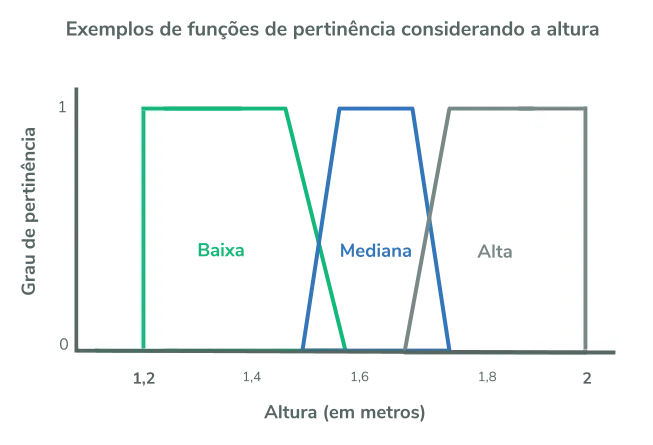

***Peso***

* Universo: considerando um valor entre 20 e 120 kg, o quão pesada é a pessoa?
* Conjunto fuzzy: baixo, médio e alto.
* Função de pertinência:

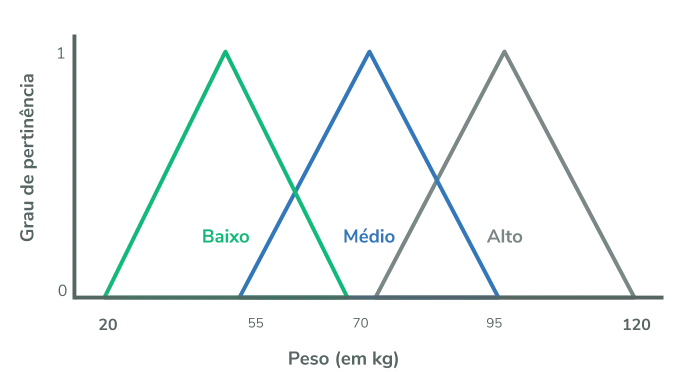

#### Saída (também chamada de consequente):

***Tamanho***

* Universo: quão grande é o tamanho da roupa, numa escala entre 0 e 1?
* Conjunto fuzzy: pequeno, médio e grande.
* Função de pertinência:

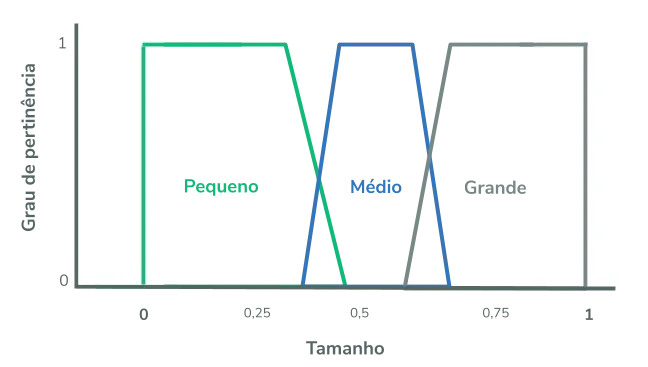

***Regras***

* SE peso é baixo ENTÃO tamanho é pequeno;
* SE altura é mediana OU peso é médio ENTÃO tamanho é médio;
* SE altura é alta E peso é alto ENTÃO tamanho é grande.

Dado o sistema definido acima, vamos fazer a inferência fuzzy ao fornecermos como entrada uma altura de 1,75 m e um peso de 75 kg.

O primeiro passo na inferência fuzzy utilizando o método Mamdami é fornecer os graus de pertinência de cada variável (de acordo com os conjuntos fuzzy) para as regras que compõem o sistema e, assim, encontrarmos a região resultante para o consequente (que no nosso caso é o tamanho da roupa). Vamos começar analisando a regra 1 definida acima:

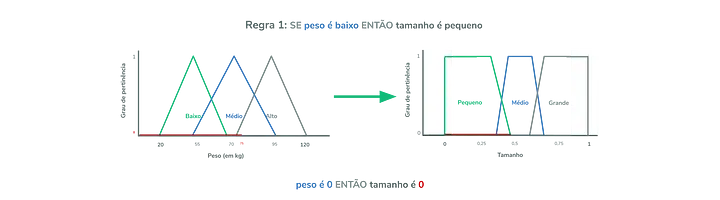

Acima, podemos ver que a região resultante para a primeira regra é 0 (gráfico à direita). Isso porque a regra diz que se o peso é baixo, então o tamanho será pequeno. Conforme podemos ver no gráfico à esquerda, o peso de 75 kg não está na área do triângulo verde, que compreende o conjunto de pesos baixos; logo, o grau de pertinência para esse conjunto será 0.

Portanto, precisamos verificar o grau de pertinência da variável no conjunto fuzzy descrito na regra para verificarmos qual será o grau de pertinência para o consequente. Vamos agora observar a regra 2:

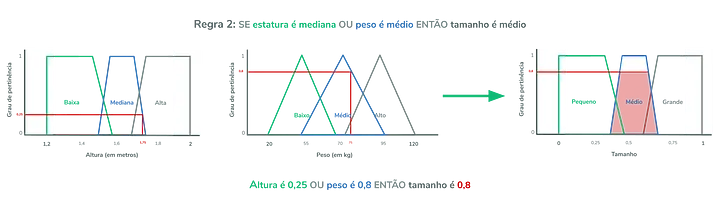

Para a segunda regra, vemos que a altura fornecida tem um grau de pertinência de 0,25 para o conjunto de estatura mediana (trapézio azul no primeiro gráfico), enquanto que o peso tem um grau de pertinência de 0,8 para o conjunto de peso médio (triângulo azul no segundo gráfico). Por que então o grau de pertinência do tamanho está como 0,8? Isso porque os dois antecedentes presentes nessa regra estão ligados pelo operador OU. Quando temos esse operador, o grau de pertinência do consequente será igual ao grau de pertinência máximo obtido pelos antecedentes (nesse caso, como os graus obtidos foram 0,25 e 0,8, o valor máximo foi 0,8). Como o grau de pertinência foi de 0,8 e estávamos avaliando o consequente com relação ao conjunto de tamanho médio, a região resultante compreenderá somente a área desse conjunto até chegar ao grau de pertinência de 0,8, que no terceiro gráfico da imagem acima está ilustrada como a região demarcada em vermelho claro.

Por fim, vamos observar o resultado com relação à regra 3:

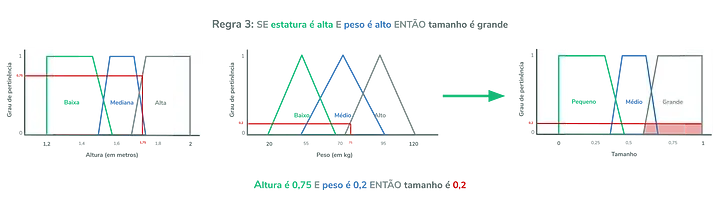

Para a terceira regra, podemos notar que a altura fornecida tem um grau de pertinência de 0,75 para o conjunto de estatura alta (trapézio cinza no primeiro gráfico), enquanto que o peso tem um grau de pertinência de 0,2 para o conjunto de peso alto (triângulo cinza no segundo gráfico). Por que o grau de pertinência do tamanho está como 0,2? Não deveria ser 0,75 como vimos na regra anterior?

Acontece que agora os dois antecedentes presentes nessa regra estão ligados pelo operador E. Quando temos esse operador, diferentemente do operador OU, o grau de pertinência do consequente será igual ao grau de pertinência mínimo obtido pelos antecedentes (nesse caso, como os graus obtidos foram 0,75 e 0,2, o valor mínimo foi 0,2). Como o grau de pertinência foi de 0,2 e estávamos avaliando o consequente com relação ao conjunto de tamanho grande, a região resultante compreenderá somente a área desse conjunto até chegar ao grau de pertinência de 0,2, que no terceiro gráfico da imagem acima também está ilustrada como a região demarcada em vermelho claro.

Após analisarmos as 3 regras do sistema, precisamos unir as 3 regiões obtidas para o consequente. Isso é feito na etapa de agregação das regras, em que as regiões obtidas para cada termo são combinadas em um único conjunto difuso para cada consequente. Abaixo temos essa unificação das saídas das regras para formar a região resultante destacada em vermelho no gráfico à direita:

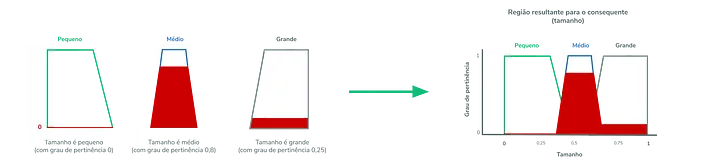

### 4) Defuzzificação

Finalmente, chegamos no componente final do nosso sistema de controle fuzzy que é chamado de defuzzificação. Ela é necessária quando se espera que o sistema retorne um número e não o conjunto fuzzy criado para cada consequente, como ocorre na maioria das vezes.

Nessa etapa, precisamos converter a saída da inferência fuzzy (que é a região resultante do consequente), feita com base nas funções de pertinência e nas regras, para um valor crisp. Diversos métodos podem ser utilizados para fazer essa conversão; abaixo estão listados alguns deles:

* Centroide
* Média dos máximos
* Mínimo dos máximos
* Máximo dos máximos

Como o método mais utilizado é o centroide, vamos utilizá-lo para explicar essa etapa. O seu cálculo varia dependendo se o consequente pode assumir valores discretos ou contínuos. Se as possibilidades forem discretas, calculamos uma média ponderada de acordo com o grau de pertinência para a distribuição de possibilidades de saída do modelo. Já se as possibilidades de valores são contínuas, aí precisaríamos aplicar integrais nesse cálculo que é feito para valores discretos:

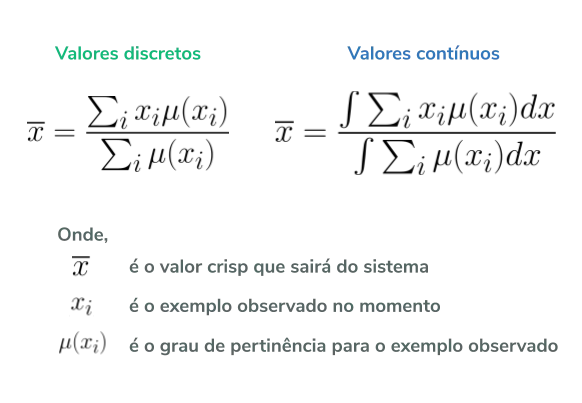

Vamos fingir que os valores possíveis do consequente do nosso exemplo são discretos apenas para simplificar. Assim, para o exemplo que usamos na etapa anterior com as entradas sendo uma altura de 1,75 m e um peso de 75 kg, temos o seguinte valor crisp de saída do sistema:



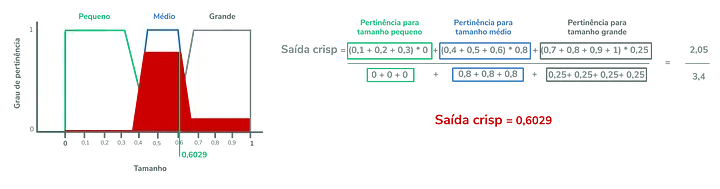

Na imagem acima, é possível observar que usamos 9 pontos diferentes no nosso conjunto fuzzy para calcular o valor crisp de saída do sistema (de 0,1 a 0,9, representados no eixo X do gráfico). Para o ponto 0,1, vemos que seu grau de pertinência para o termo pequeno é 0, por isso ele é multiplicado por 0 assim como os pontos 0,2 e 0,3. Já no ponto 0,4 temos um grau de pertinência de 0,8 para o termo médio, por isso ele é multiplicado por 0,8, assim como os pontos 0,5 e 0,6. Fazemos essas multiplicações pelos graus de pertinência para todos os pontos observados e depois dividimos pela soma dos graus de pertinência (que são somados de acordo com a quantidade de pontos que foram multiplicados por eles no numerador da divisão) para fazer a média ponderada e, assim, obter o valor crisp de saída do sistema.

Portanto, fornecendo uma altura de 1,75 m e um peso de 75 kg para o sistema que criamos de exemplo, a saída desse sistema seria 0,6029. Nesse caso em específico do tamanho da roupa não faz muito sentido olhar a saída crisp, visto que é muito mais informativo saber se é pequeno, médio ou grande, mas para casos reais, obter a saída do sistema fuzzy como um valor numérico pode ser muito útil para tomadas de decisões, priorizações e análises, por exemplo.

Caso quiséssemos utilizar os conceitos de pequeno, médio e grande com base na saída crisp, o que poderíamos fazer nesse exemplo é considerar o intervalo do tamanho (que, conforme definimos no universo é: quão grande é o tamanho da roupa, numa escala entre 0 e 1?) e dividi-lo em 3 partes de modo que as saídas crisp entre 0 e 0,33 serão consideradas um tamanho pequeno; saídas entre 0,33 e 0,66 serão tamanho médio; e saídas acima disso serão de tamanho grande. Assim, para esse exemplo em que a saída foi de 0,6029, poderíamos considerar que o tamanho seria médio.

Pronto, terminamos de ver todos os componentes de um sistema de controle fuzzy!

Resumindo então o passo a passo do que precisamos fazer para usar esse sistema:

1. Identificar as variáveis (tanto as de entrada quanto de saída);
2. Definir os universos e termos de cada uma das variáveis;
3. Definir as funções de pertinência para cada subconjunto fuzzy;
4. Criar as regras fuzzy relacionando os antecedentes e consequentes (lembrando dos operadores E, OU e NÃO que podem ser utilizados para defini-las);
5. Fazer a fuzzificação de acordo com o método escolhido (aqui usamos o Mamdami, mas há outros como um chamado Sugeno);
6. Agregar as saídas obtidas após a fuzzificação para cada regra de forma a se obter um único conjunto fuzzy para cada consequente;
7. Fazer a defuzzificação para se obter um número que represente o consequente no “mundo real” (lembrando que há diversos métodos existentes que podem ser utilizados para fazer essa defuzzificação);
8. Volte para o começo e refaça as definições do sistema caso veja que as saídas não estão fazendo muito sentido (falaremos mais sobre isso na parte sobre vantagens e desvantagens).

**Legal! E como eu faço isso para combinar os meus modelos de Machine Learning usando Lógica Fuzzy em Python?**

Isso você pode conferir na segunda parte do notebook [aqui](https://github.com/renangarciarosa/Logica-Fuzzy-Machine-Learning/blob/main/ML_com_Logica_Fuzzy_Parte_02.ipynb), em que além do código em Python, também há uma parte sobre as vantagens e desvantagens de se utilizar lógica fuzzy para fazer essa combinação. Não deixe de conferir 😉